In [1]:
from kaggle.api.kaggle_api_extended import KaggleApi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from langdetect import detect
from googletrans import Translator

In [6]:
dataset = pd.read_csv('cleanData.csv')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
groupedData = dataset.groupby('rating')

In [ ]:
groupedData.get_group(1)['rating'].count()

In [ ]:
bins = pd.cut(dataset['rating'], [1, 2, 3, 4, 5])
dataset_Rating = dataset.groupby(bins)['rating'].agg(['count'])
dataset_Rating['count']

In [ ]:
categorizedData = dataset.groupby('category')

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
ax.set_facecolor('white')
dataset.groupby(['rating']).sum()['reviews'].plot(ax=ax)

In [ ]:
# dataset.groupby('rated').case_status.value_counts().plot.barh()

In [ ]:
dataset.groupby('rated').category.value_counts().unstack(0).plot.barh(figsize=(10,7), title = 'title')

In [ ]:
# a = np.arange(1,6)
# dataset.groupby('category').a.unstack(0).plot.barh(figsize=(10,7), title = 'title')

In [ ]:
bins = [1,2]
df = dataset.groupby(pd.cut(dataset['rating'], bins=bins)).rating.value_counts()
df.plot(kind='bar')

In [ ]:
plt.figure(figsize=(16, 6))
sns.countplot(dataset['rated'])

In [ ]:
columns = np.array(dataset.columns)
columns

In [ ]:
installs = dataset.price

In [ ]:
installs.plot(kind='hist')

In [ ]:
dataset.columns

In [ ]:
groupedbydata= dataset.groupby('category')

In [12]:
groupdata_avg = groupedbydata.mean()
groupdata_max = groupedbydata.max()
groupdata_count = groupedbydata.count()
groupdata_count_series = groupdata_count.iloc[:,0]

NameError: name 'groupedbydata' is not defined

In [ ]:
groupdata_avg

In [ ]:
groupdata_count_series

In [ ]:
numApp_rating = pd.DataFrame({
    'rating': groupdata_avg['rating'],
    'app': groupdata_count_series    
})
numApp_rating

In [ ]:
plt.figure(figsize=(16, 6))
plt.hist(numApp_rating['rating'])
plt.xticks(rotation=90)

In [ ]:
plt.figure(figsize=(16, 6))
plt.plot(groupdata_count_series)
plt.xticks(rotation=90)
plt.show()

In [ ]:
alternative_method = groupdata_avg.merge(groupdata_count, 
                      left_index=True, right_index=True,
                      suffixes=['_avg', '_count'])

#alternative_method[['app', 'rating_avg']].sort_values(by=['app', 'rating_avg'], ascending=True).plot(kind='barh', figsize=(18, 6), title='title')
alternative_method[['rating_avg']].sort_values(by=['rating_avg'], ascending=False).plot(kind='barh', figsize=(18, 6), title='title')

In [ ]:
alternative_method

In [ ]:
groupdata_max

In [ ]:
# max_group = groupdata_.merge(groupdata_count, 
#                       left_index=True, right_index=True,
#                       suffixes=['_avg', '_count'])

# alternative_method[['app', 'rating_avg']].sort_values(by=['app', 'rating_avg'], ascending=True).plot(kind='barh', figsize=(18, 6), title='title')


In [ ]:
dataset.columns

In [9]:
from cycler import cycler

In [10]:
plt.rc('axes', prop_cycle=(cycler('color', sns.color_palette("hls", 33))))

In [ ]:
gdf = dataset.groupby(["category"])['rating']

In [ ]:
ax = gdf.plot(kind='hist', legend = True, bins =15, figsize=(18, 10))
ax.titile('Title')

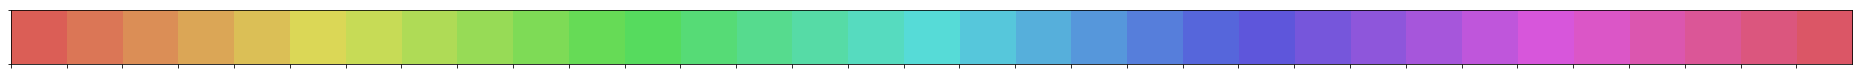

In [11]:
sns.palplot(sns.color_palette("hls", 33))